In [15]:
import pandas as pd
import numpy as np


In [16]:
import os
print(os.getcwd())


/Users/andrii/Documents/londons_fashionable_finds


In [17]:
os.chdir('/Users/andrii/Documents/londons_fashionable_finds')


In [18]:
shops = pd.read_csv('02_Data_preprocessing/merged_shops_data.csv')

In [19]:
from IPython.display import display

display(shops)

,name,address,latitude,longitude,rating,borough,shop_id,Unnamed: 0,Code,Area,Value,Code_earnings,Area_earnings,Pay_2021
0,Vintage80scasuals,"Unit 63, 105 Culvert Rd, London",51.470904,-0.156681,0.0,Wandsworth,0,3856.0,E09000032,Wandsworth,"640,000",00BJ,Wandsworth,746.7
1,Accessories of Old,"Next to Safestore, Arch 10 Munster Rd, London",51.472579,-0.203859,0.0,Hammersmith and Fulham,1,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
2,Eclectica (Clapham),"803 Wandsworth Rd, London",51.466581,-0.148460,4.9,Lambeth,2,3846.0,E09000022,Lambeth,"510,000",00AY,Lambeth,673.6
3,BajaboutiqueGB,"37 Elbe St, London",51.472878,-0.185076,0.0,Hammersmith and Fulham,3,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
4,INSIGHT Fulham Dress Agency,"201 Munster Rd, London",51.479447,-0.211883,5.0,Hammersmith and Fulham,4,3837.0,E09000013,Hammersmith and Fulham,"740,000",00AN,Hammersmith and Fulham,714.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Little Crumbs,"194 Balls Pond Rd, London",51.546717,-0.086736,3.8,Islington,2463,3843.0,E09000019,Islington,"625,000",00AU,Islington,665.6
640,Isabella Bazaar Dalston,"500 Kingsland Rd, London",51.543723,-0.075801,0.0,Hackney,2465,3836.0,E09000012,Hackney,"530,000",00AM,Hackney,575.1
641,Oxfam Shop Walthamstow,"2-4 High St, London",51.581558,-0.033495,4.0,Waltham Forest,2468,3855.0,E09000031,Waltham Forest,"430,000",00BH,Waltham Forest,624.7
642,The Salvation Army (Clapton),"122 Lower Clapton Rd, London",51.554421,-0.053815,4.9,Hackney,2470,3836.0,E09000012,Hackney,"530,000",00AM,Hackney,575.1


In [20]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           644 non-null    object 
 1   address        644 non-null    object 
 2   latitude       644 non-null    float64
 3   longitude      644 non-null    float64
 4   rating         644 non-null    float64
 5   borough        643 non-null    object 
 6   shop_id        644 non-null    int64  
 7   Unnamed: 0     643 non-null    float64
 8   Code           643 non-null    object 
 9   Area           643 non-null    object 
 10  Value          643 non-null    object 
 11  Code_earnings  643 non-null    object 
 12  Area_earnings  643 non-null    object 
 13  Pay_2021       643 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 70.6+ KB


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


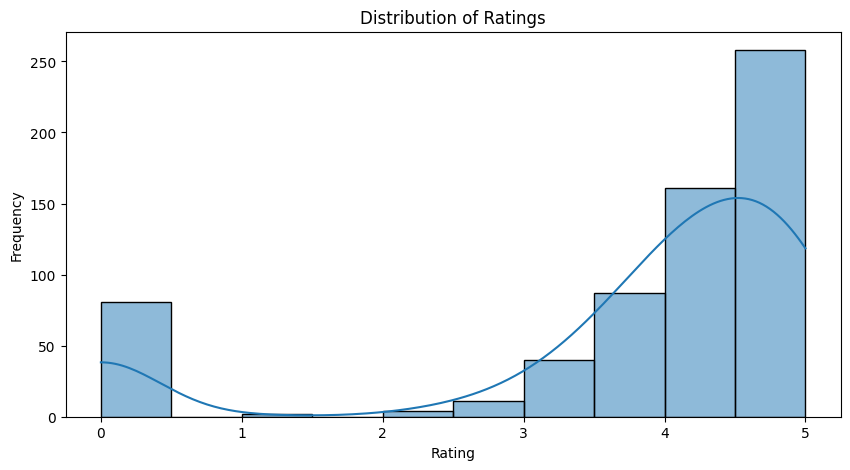

In [22]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=shops, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


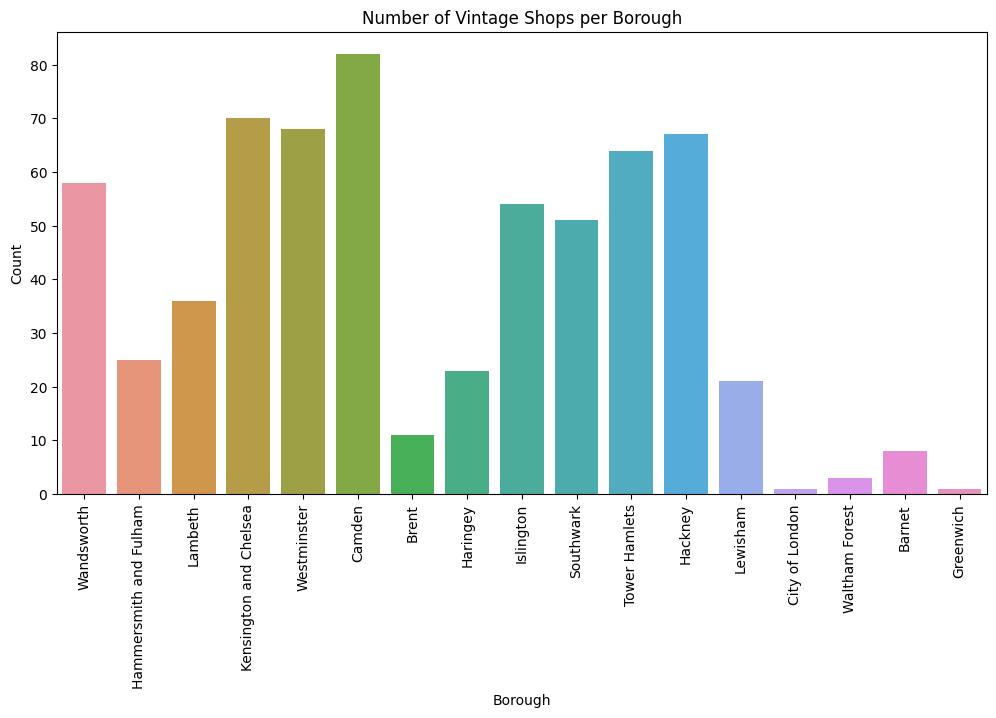

In [24]:
# Number of vintage shops per borough:
plt.figure(figsize=(12, 6))
sns.countplot(data=shops, x='borough')
plt.title('Number of Vintage Shops per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


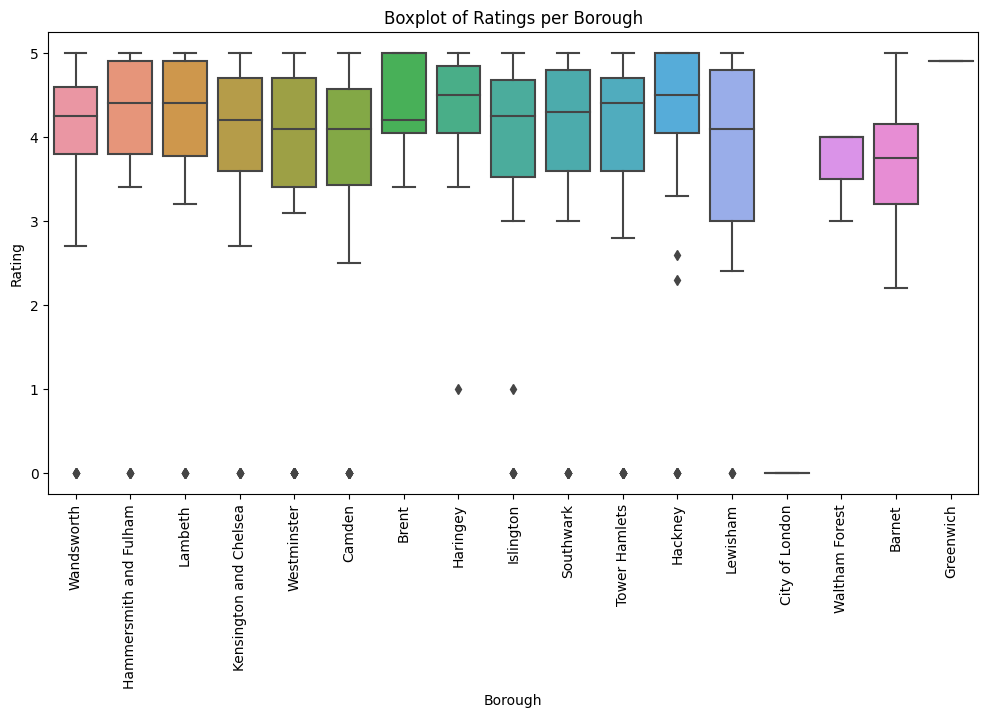

In [25]:
# Boxplot of ratings per borough
plt.figure(figsize=(12, 6))
sns.boxplot(data=shops, x='borough', y='rating')
plt.title('Boxplot of Ratings per Borough')
plt.xlabel('Borough')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


In [26]:
missing_values = shops.isnull().sum()
print(missing_values)


name             0
address          0
latitude         0
longitude        0
rating           0
borough          1
shop_id          0
Unnamed: 0       1
Code             1
Area             1
Value            1
Code_earnings    1
Area_earnings    1
Pay_2021         1
dtype: int64


In [27]:
# create Boolean mask of missing values
missing_mask = shops.isnull().any(axis=1)

# index the DataFrame using the missing_mask
shops_missing = shops[missing_mask]

display(shops_missing)

# to save time on investigation since there are only 2 shops - just remove them

,name,address,latitude,longitude,rating,borough,shop_id,Unnamed: 0,Code,Area,Value,Code_earnings,Area_earnings,Pay_2021
26,Silk & Sawdust,"2 Michael Rd, London",51.47718,-0.186552,5.0,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# remove rows with missing values
shops = shops.dropna(axis=0)

In [29]:
missing_values = shops.isnull().sum()
print(missing_values)

name             0
address          0
latitude         0
longitude        0
rating           0
borough          0
shop_id          0
Unnamed: 0       0
Code             0
Area             0
Value            0
Code_earnings    0
Area_earnings    0
Pay_2021         0
dtype: int64


In [30]:
# Where did this come from? Unnamed: 0

In [31]:
column_types = shops.dtypes
print(column_types)


name              object
address           object
latitude         float64
longitude        float64
rating           float64
borough           object
shop_id            int64
Unnamed: 0       float64
Code              object
Area              object
Value             object
Code_earnings     object
Area_earnings     object
Pay_2021          object
dtype: object


In [32]:
import pandas as pd
import re

# Assuming your DataFrame is named shops
# Define a function to remove non-numeric characters
def remove_non_numeric(value):
    cleaned_value = re.sub('[^0-9.]', '', str(value))
    return cleaned_value if cleaned_value else None

# Apply the function to the 'Value' and 'Pay_2021' columns
shops['Value'] = shops['Value'].apply(remove_non_numeric)
shops['Pay_2021'] = shops['Pay_2021'].apply(remove_non_numeric)

# Drop rows containing None in either 'Value' or 'Pay_2021' columns
shops = shops.dropna(subset=['Value', 'Pay_2021'])

# Convert 'Value' and 'Pay_2021' columns to float
shops['Value'] = shops['Value'].astype(float)
shops['Pay_2021'] = shops['Pay_2021'].astype(float)

# Select relevant columns
selected_columns = shops[['rating', 'Value', 'Pay_2021']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

print(correlation_matrix)


            rating     Value  Pay_2021
rating    1.000000 -0.053806 -0.086727
Value    -0.053806  1.000000  0.781121
Pay_2021 -0.086727  0.781121  1.000000


In [33]:
display(selected_columns)

# a rating of 0 in the dataset indicates that the shop has not received any reviews, rather than a genuine 0-star rating
# the rating scale on Google goes from 1 to 5 stars. In other words, there is no option for users to leave a 0-star rating

,rating,Value,Pay_2021
0,0.0,640000.0,746.7
1,0.0,740000.0,714.5
2,4.9,510000.0,673.6
3,0.0,740000.0,714.5
4,5.0,740000.0,714.5
...,...,...,...
639,3.8,625000.0,665.6
640,0.0,530000.0,575.1
641,4.0,430000.0,624.7
642,4.9,530000.0,575.1


In [34]:
import pandas as pd

# Assuming you have already loaded the dataset as 'shops'
# Calculate the mean rating of non-zero ratings
mean_rating = shops[shops['rating'] > 0]['rating'].mean()

# Replace zero ratings with the mean rating
shops['rating'] = shops['rating'].replace(0, mean_rating)


In [35]:
display(selected_columns)


,rating,Value,Pay_2021
0,0.0,640000.0,746.7
1,0.0,740000.0,714.5
2,4.9,510000.0,673.6
3,0.0,740000.0,714.5
4,5.0,740000.0,714.5
...,...,...,...
639,3.8,625000.0,665.6
640,0.0,530000.0,575.1
641,4.0,430000.0,624.7
642,4.9,530000.0,575.1


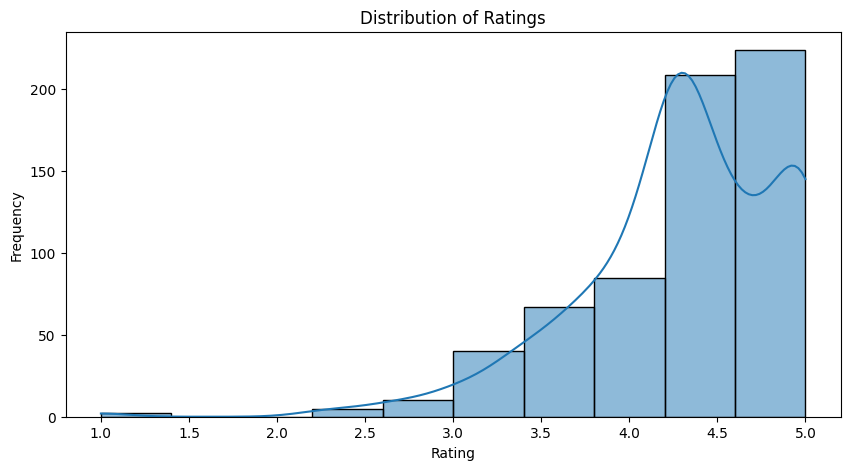

In [48]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=shops, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [36]:
# Select relevant columns
selected_columns = shops[['rating', 'Value', 'Pay_2021']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

            rating     Value  Pay_2021
rating    1.000000 -0.056739 -0.047918
Value    -0.056739  1.000000  0.781121
Pay_2021 -0.047918  0.781121  1.000000


1. The correlation between rating and Value is -0.063422, indicating a very weak negative relationship between the two variables. This means that as the rating increases, the property value tends to decrease slightly, but the relationship is not strong.

2. The correlation between rating and Pay_2021 is -0.055488, indicating a very weak negative relationship between the two variables. This means that as the rating increases, the pay in 2021 tends to decrease slightly, but the relationship is not strong.

3. The correlation between Value and Pay_2021 is 0.782316, indicating a moderately strong positive relationship between the two variables. This means that as the property value increases, the pay in 2021 also tends to increase. This relationship is stronger compared to the other two correlations in the matrix.

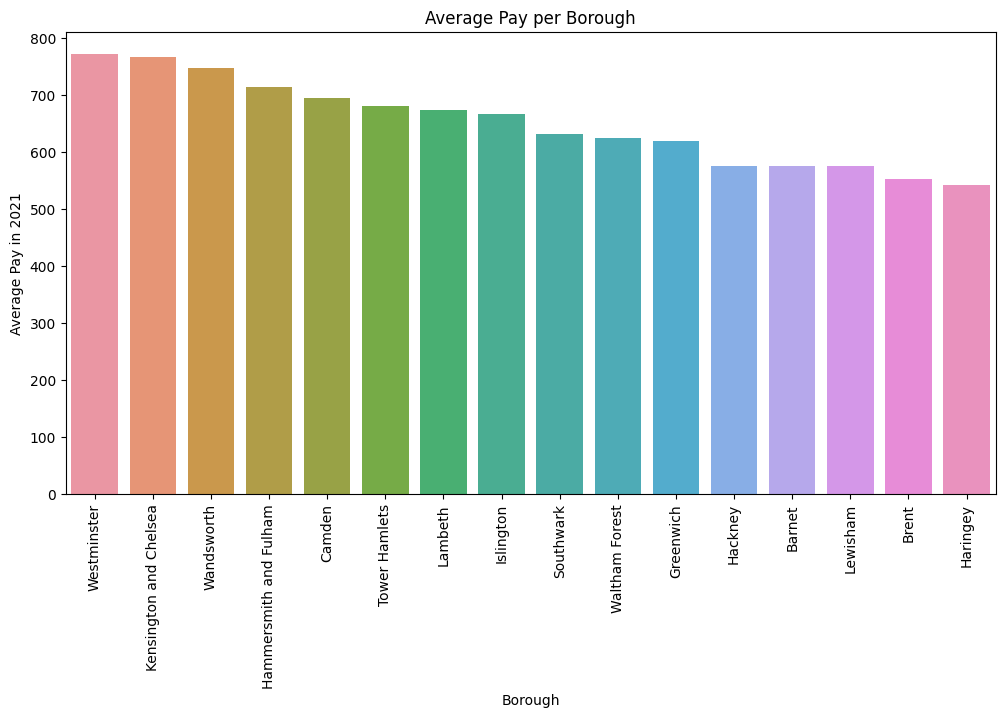

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by borough and calculate the average pay
average_pay_per_borough = shops.groupby('borough')['Pay_2021'].mean().reset_index()

# Sort the DataFrame by average pay in descending order
average_pay_per_borough = average_pay_per_borough.sort_values('Pay_2021', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='Pay_2021', data=average_pay_per_borough)
plt.xticks(rotation=90)
plt.title('Average Pay per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Pay in 2021')
plt.show()



In [38]:
# Remove irrelevant and duplicate columns
cleaned_shops = shops.drop(columns=['Unnamed: 0', 'Code', 'Area', 'Code_earnings', 'Area_earnings', 'shop_id'])

# Rename the columns
cleaned_shops = cleaned_shops.rename(columns={
    'name': 'Shop_Name',
    'address': 'Address',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'rating': 'Rating',
    'borough': 'Borough',
    'Value': 'Property_Value_2017',
    'Pay_2021': 'Earnings_2021'
})

# Display the cleaned data
display(cleaned_shops)


,Shop_Name,Address,Latitude,Longitude,Rating,Borough,Property_Value_2017,Earnings_2021
0,Vintage80scasuals,"Unit 63, 105 Culvert Rd, London",51.470904,-0.156681,4.287722,Wandsworth,640000.0,746.7
1,Accessories of Old,"Next to Safestore, Arch 10 Munster Rd, London",51.472579,-0.203859,4.287722,Hammersmith and Fulham,740000.0,714.5
2,Eclectica (Clapham),"803 Wandsworth Rd, London",51.466581,-0.148460,4.900000,Lambeth,510000.0,673.6
3,BajaboutiqueGB,"37 Elbe St, London",51.472878,-0.185076,4.287722,Hammersmith and Fulham,740000.0,714.5
4,INSIGHT Fulham Dress Agency,"201 Munster Rd, London",51.479447,-0.211883,5.000000,Hammersmith and Fulham,740000.0,714.5
...,...,...,...,...,...,...,...,...
639,Little Crumbs,"194 Balls Pond Rd, London",51.546717,-0.086736,3.800000,Islington,625000.0,665.6
640,Isabella Bazaar Dalston,"500 Kingsland Rd, London",51.543723,-0.075801,4.287722,Hackney,530000.0,575.1
641,Oxfam Shop Walthamstow,"2-4 High St, London",51.581558,-0.033495,4.000000,Waltham Forest,430000.0,624.7
642,The Salvation Army (Clapton),"122 Lower Clapton Rd, London",51.554421,-0.053815,4.900000,Hackney,530000.0,575.1


In [ ]:
cleaned_shops.to_csv('03_Feature_engineering/shops.csv')

In [39]:
# The cleaned data doesn't contain enough relevant factor to build a meaningful model
# A potential model in mind to rank the shops most likely to have the best deal is a weighted scoring model, 
# where I assign weights to each factor based on their importance 
# and calculate a composite score for each shop

1. [Statista](https://www.statista.com/statistics/319953/charity-shops-sales-revenue-in-the-united-kingdom-uk/) provides data (private paid) on the sales revenue of charity shops in the UK, which can be a useful starting point for understanding the sector

2. Charity Financials 

3. https://www.theodi.org/ no data sets to download

4. https://www.gov.uk/find-charity-information this looks promising


In [43]:
# let's explore https://www.gov.uk/find-charity-information

# 1. on the website find charities in Greenwich to match with the ones in my data set
# Filter the DataFrame to get all shops in the Greenwich borough
greenwich_shops = cleaned_shops[cleaned_shops['Borough'] == 'Greenwich']

# Print the filtered DataFrame
display(greenwich_shops)

# see 02_charity_register_extractoion.ipynb for details
# TL;DR
# doesn't look the register data would be useful for my project
# but if was good to explore this option


,Shop_Name,Address,Latitude,Longitude,Rating,Borough,Property_Value_2017,Earnings_2021
627,The Well Charity Shop,London,51.481491,-0.025742,4.9,Greenwich,401000.0,618.9


In [ ]:
import pandas as pd

# Define the importance weights for each factor
weight_rating = 0.4
weight_property_value = 0.3
weight_earnings = 0.3

# Calculate the composite score for each shop using the weighted scoring model
cleaned_shops['composite_score'] = (cleaned_shops['Rating'] * weight_rating) + \
                                   (cleaned_shops['Property_Value_2017'] * weight_property_value) + \
                                   (cleaned_shops['Earnings_2021'] * weight_earnings)

# Rank the shops by composite score in descending order
ranked_shops = cleaned_shops.sort_values('composite_score', ascending=False)



In [51]:
# Print the top 10 shops by composite score
display(ranked_shops.head(10))

,Shop_Name,Address,Latitude,Longitude,Rating,Borough,Property_Value_2017,Earnings_2021,composite_score
79,This Old Thing London,"79 Portobello Rd, London",51.512732,-0.202126,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
60,Oliver Vintage,"Unit 7, Portobello Green Arcade, 281 Portobell...",51.518562,-0.207352,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
77,Vintage Fur Garden,"82 Portobello Rd, London",51.512678,-0.201661,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
25,Vittorio Ragone Design,"533 King's Rd, London",51.480272,-0.185448,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
69,vintage clothing,London,51.523625,-0.206717,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
371,Royal Trinity Hospice - Earl's Court shop,"202 Earls Ct Rd, London",51.492624,-0.193999,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
58,Antique Clothing Shop,"282 Portobello Rd, London",51.519292,-0.207412,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
397,Vision Foundation - Portobello Road,"235 Portobello Rd, London",51.517032,-0.206121,5.0,Kensington and Chelsea,1200000.0,767.0,360232.10
40,AntikBar - Original Vintage Posters,"404 King's Rd, London",51.483615,-0.177151,4.9,Kensington and Chelsea,1200000.0,767.0,360232.06
30,Hornets,"2 & 4 Kensington Church Walk, London",51.502533,-0.192820,4.9,Kensington and Chelsea,1200000.0,767.0,360232.06
